<a href="https://colab.research.google.com/github/nealtheseal108/imitation/blob/main/Copy_of_Basic_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import numpy as np # numpy math library
import pandas as pd # data manipulation and examination library
from matplotlib import pyplot as plt # matplotlib plotting library
from sklearn import linear_model # sci-kit-learn modeling library

# area to price conversion

In [6]:
df = pd.read_csv('homeprices.csv') # DataFrame is utilized to read the CSV file

FileNotFoundError: ignored

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
%matplotlib inline

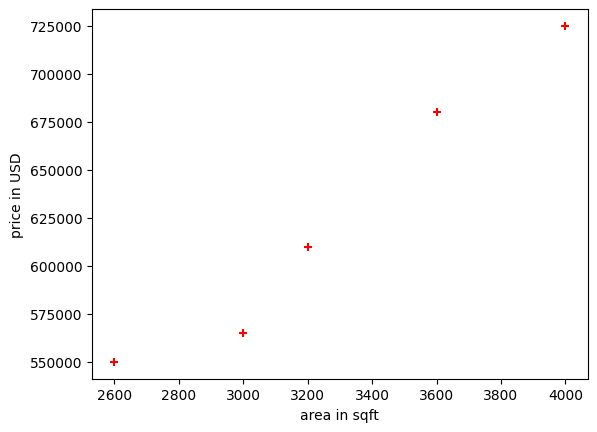

In [ ]:
plt.xlabel('area in sqft')
plt.ylabel('price in USD')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
new_df = df.drop('price',axis='columns')
# new_df
area = df.area.to_frame()
type(area)

pandas.core.frame.DataFrame

In [ ]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

### Y = m * X + b (m is coefficient and b is intercept)

In [ ]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [ ]:
# Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

In [ ]:
a = np.array([2000,2500,3000])

In [ ]:
a

array([2000, 2500, 3000])

In [ ]:
areas = pd.DataFrame(a,columns=['area'])

In [ ]:
areas

,area
0,2000
1,2500
2,3000


In [ ]:
#predict for a whole set of houses
reg.predict(areas)

array([452191.78082192, 520085.61643836, 587979.45205479])

In [ ]:
p = reg.predict(areas)
areas['prices'] = p
areas

,area,prices
0,2000,452191.780822
1,2500,520085.616438
2,3000,587979.452055


In [ ]:
areas.to_csv('output.csv')

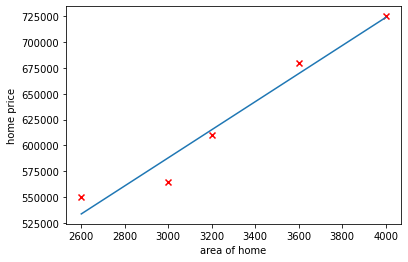

In [ ]:
plt.xlabel('area of home')
plt.ylabel('home price')
plt.scatter(df.area,df.price,color='red',marker='x')
plt.plot(df.area,reg.predict(df[['area']]))